In [1]:
# from sklearn.datasets import load_diabets
# (1) 데이터 가져오기
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes(as_frame = True) #diabetes는 데이터프레임이 아닌 sklearn의 데이터셋 객체인 Bunch 형식의 객체 따라서 프레임으로 TRue

In [3]:
# print(diabetes)
import pandas as pd
import numpy as np

In [4]:
df_x = diabetes['data']
df_x
# (2) 모델에 입력할 데이터 X 준비하기
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
# Corrr = df_x(columns['s1'],;)\

df_y = diabetes['target']
df_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [5]:
origin = pd.concat ([df_x, df_y], axis= 1)
origin.corr(method='pearson')
# (3) 모델에 예측할 데이터 y 준비하기
# df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [6]:
features = ['bmi','bp', 's3','s4','s5','s6']
X = df_x[features].values
y = df_y.values
df_y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 50)
# (4) train 데이터와 test 데이터로 분리하기
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [8]:
from sklearn.preprocessing import StandardScaler

# # Feature Scaling 적용을 위해 표준화 객체 생성
# scaler = StandardScaler()

# # 훈련 데이터에 대해 스케일링 적용하고 변환
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터에 대해 스케일링 적용하고 변환
# X_test_scaled = scaler.transform(X_test)

# (5) 모델 준비하기
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
# # 모델 함수를 구현해주세요.
import numpy as np
W = np.random.rand(len(features)) #6개의 특성
b = np.random.rand() #상수

def model(X,W,b):
    predictions = b
    for i in range(X.shape[1]) : 
        predictions += X[:,i] * W[i]
    predictions += b
    return predictions



In [9]:
# (6) 손실함수 loss 정의하기
# 손실함수를 MSE 함수로 정의해주세요.
def MSE(a,b) : 
    mse = ((a-b)**2).mean()
    return mse
def loss(X,W,b,y) : 
    predictions = model(X,W,b)
    L = MSE(predictions,y)
    return L


In [10]:
# (7) 기울기를 구하는 gradient 함수 구현하기
# 기울기를 계산하는 gradient 함수를 구현해주세요.
# def gradient(x,w,b,y) : 
#     dw = ((loss(x, w + 1e-5, b, y) - loss(x, w, b, y)) / 1e-5)
#     db = ((loss(x, w, b + 1e-51, y) - loss(x, w, b, y)) / 1e-5)
#     return dw, db
# 수치 미분 이용, 오차 클 수도 있음 
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
#미분 공식을 이용해 바로 적용, 위 방법보다 오차 적음

In [11]:
# 데이터 정규화를 위한 평균과 표준편차 계산
# X_mean = X_train.mean(axis=0)
# X_std = X_train.std(axis=0)

# # 정규화된 입력 데이터 준비
# X_train_normalized = (X_train - X_mean) / X_std
# X_test_normalized = (X_test - X_mean) / X_std

# 사이킷런 사이트에 들어가면 확인할 수 있는데, 이는 모든 특성이 -0.2 ~ 0.2 사이에 분포하도록 조정해서 정규화를 해도 비슷한 결과가 나온다.

Iteration 10000 : Loss 3132.2735
Iteration 20000 : Loss 3097.3732
Iteration 30000 : Loss 3089.8666
Iteration 40000 : Loss 3087.3682
Iteration 50000 : Loss 3086.4396
Iteration 60000 : Loss 3086.0862
Iteration 70000 : Loss 3085.9511
Iteration 80000 : Loss 3085.8994
Iteration 90000 : Loss 3085.8796
Iteration 100000 : Loss 3085.8720


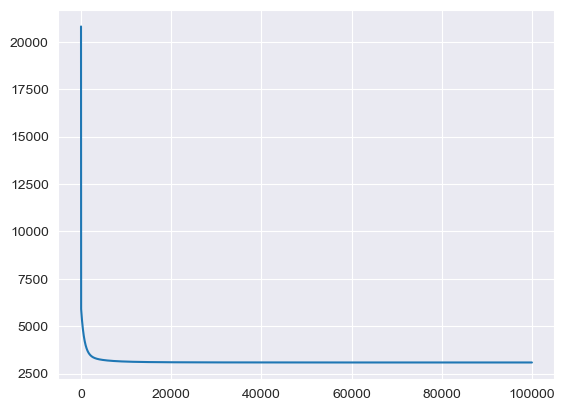

In [12]:
# (8) 하이퍼 파라미터인 학습률 설정하기
# 학습률, learning rate 를 설정해주세요
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
LEARNING_RATE = 0.05
losses=[]
for i in range(1,100001) : 
    dW, db = gradient(X_train, W, b, y_train)
#     print(dW, db)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
import matplotlib.pyplot as plt
dW, db = gradient(X, W, b, y)
# print("dW:", dW)
# print("db:", db)
plt.plot(losses)

plt.show()

# 학습률 조정: . 학습률이 너무 크면 수렴하지 못할 수 있으며, 너무 작으면 학습이 느려질 수 있습니다.
# 반복 횟수 조정: 현재 1만 번의 반복을 수행하고 있습니다. 더 많은 반복을 수행하여 최적화를 더 진행해보세요.
# 더 복잡한 모델 사용: 선형 모델이 아닌 더 복잡한 모델을 고려해보세요. 예를 들어, 다항 회귀 또는 다양한 특성 변환을 통해 모델의 표현력을 높일 수 있습니다.
# 정규화 적용: 과적합을 방지하기 위해 L1 또는 L2 정규화를 적용해보세요. 이는 모델의 가중치를 제한하여 일반화 성능을 향상시킬 수 있습니다.
# Feature Scaling: 입력 데이터의 스케일을 조정하는 방법도 고려해볼 수 있습니다. 예를 들어, 평균을 빼고 표준편차로 나누는 표준화(Standardization)를 적용할 수 있습니다.
# 다른 Optimizer 사용: 경사 하강법 외에도 다양한 옵티마이저를 시도해보세요. 예를 들어, Adam, RMSprop 등의 옵티마이저를 사용해 볼 수 있습니다.
# 더 많은 데이터: 더 많은 데이터를 수집하거나, 혹은 데이터 증강 기법을 사용하여 데이터를 늘릴 수 있습니다.

In [13]:
# (9) 모델 학습하기
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([ 88.49981096,  82.04929413, 276.32233211,  72.7529602 ,
        84.83368142,  68.688118  , 141.86952621, 169.50289845,
       118.86069283, 128.4750153 , 151.23803228, 101.38847408,
       116.39194271,  82.19113006, 125.2778308 ,  73.40556379,
        70.34154114, 140.45555373, 170.0079232 , 111.33380572,
       174.86959363, 145.75890339, 155.74592398, 126.18428892,
       190.88738354, 153.04768224, 160.71548681, 113.32644201,
       137.13426933, 240.48166767, 227.51437697, 193.7992014 ,
        60.3306151 ,  62.94043342,  76.22066059,  60.44386164,
       144.92954076, 129.7408817 , 166.4175678 , 151.73782042,
       196.91348189, 157.69300983, 166.64724733, 112.8970035 ,
       191.8318373 , 181.56599388, 141.08551636, 182.8378382 ,
       177.07481845,  77.77413239, 149.9179944 , 109.67203474,
       197.67766895, 149.42729242,  90.38427489, 145.55484895,
       144.87274973, 222.8798638 , 107.11467957, 229.01306331,
       193.90766749, 150.66490119,  53.28453199, 133.79

In [14]:
# (10) test 데이터에 대한 성능 확인하기
# test 데이터에 대한 성능을 확인해주세요.
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2663.2245170344636

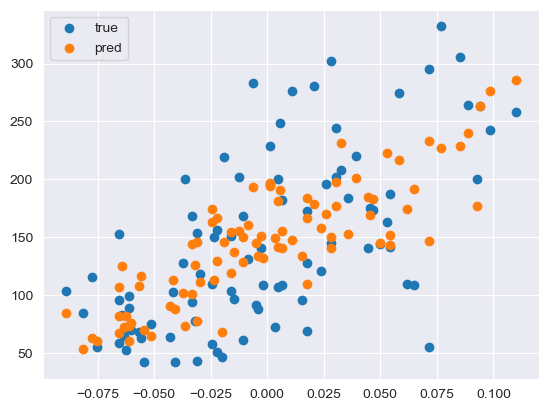

In [15]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

In [16]:
# 8-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [17]:
csv_path = '~/data/data/bike-sharing-demand/train.csv'

In [18]:
train = pd.read_csv(csv_path)
train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lgw33/data/data/bike-sharing-demand/train.csv'

In [19]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [20]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [21]:
# print(train.head())

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

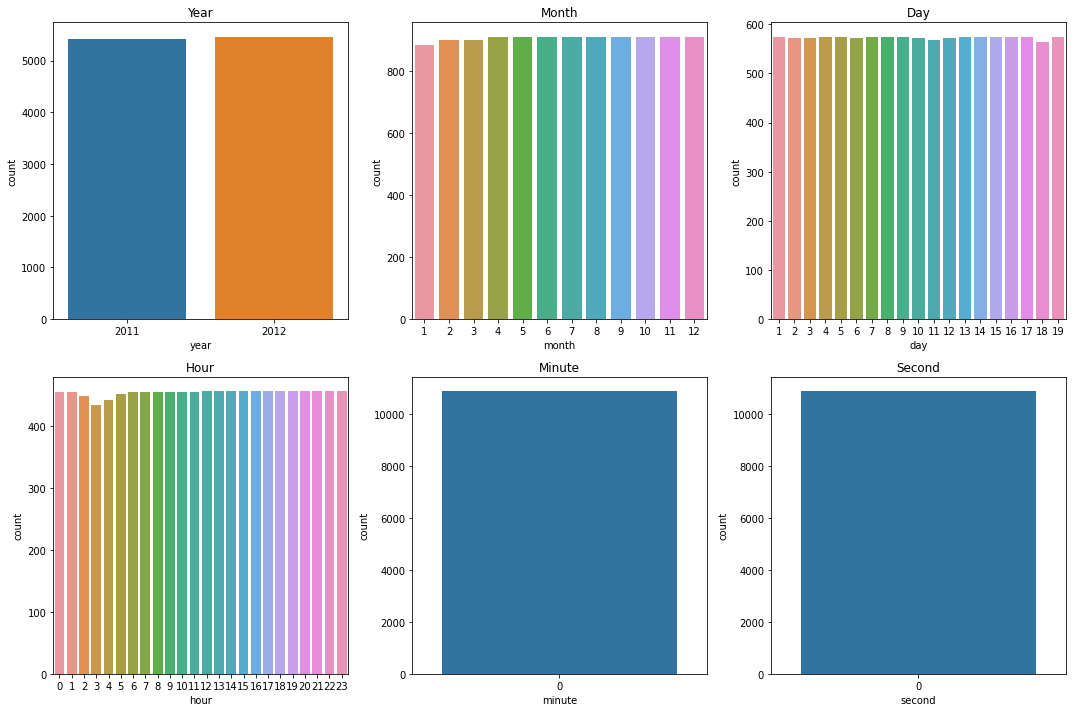

In [23]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=train, x='year')
plt.title('Year')

plt.subplot(2, 3, 2)
sns.countplot(data=train, x='month')
plt.title('Month')

plt.subplot(2, 3, 3)
sns.countplot(data=train, x='day')
plt.title('Day')

plt.subplot(2, 3, 4)
sns.countplot(data=train, x='hour')
plt.title('Hour')

plt.subplot(2, 3, 5)
sns.countplot(data=train, x='minute')
plt.title('Minute')

plt.subplot(2, 3, 6)
sns.countplot(data=train, x='second')
plt.title('Second')

plt.tight_layout() #크기 조절 축 숫자 겹치는 것들 안 겹치게
plt.show()

In [24]:
# from sklearn.linear_model import LinearRegression

# mod = LinearRegression()
# mod.fit(X_train, y_train)
# pred = mod.predict(X_test)

target_datetime = pd.Timestamp('2012-06-18 15:00:00')  # 날짜와 시간을 원하는 형식으로 변경
target_data = train[train['datetime'] == target_datetime]

# 특성 선택 (여기에서는 필요한 특성만 선택했습니다)
features = ['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

X = train[features]
y = train['count']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# 모델 훈련
mod = LinearRegression()
mod.fit(X_train, y_train)

# 예측 시간대의 데이터 예측
target_data_features = target_data[features]
prediction = mod.predict(target_data_features)

print("Predicted bike count:", prediction[0])

Predicted bike count: 279.8352051175898


In [25]:
# 모델에 X_test 입력해서 예측값 출력
y_pred = mod.predict(X_test)

# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산 (MSE)
mse = mean_squared_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 19962.512851273386
Root Mean Squared Error (RMSE): 141.28875698820974


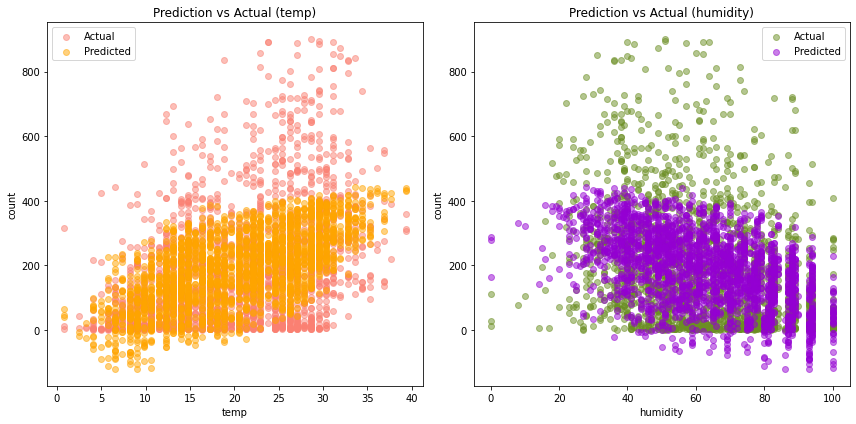

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, label='Actual', alpha=0.5, color="salmon")
plt.scatter(X_test['temp'], y_pred, label='Predicted', alpha=0.5, color="orange")
plt.xlabel('temp')
plt.ylabel('count')
plt.title('Prediction vs Actual (temp)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, label='Actual', alpha=0.5,color= "olivedrab")
plt.scatter(X_test['humidity'], y_pred, label='Predicted', alpha=0.5,color = "darkviolet")
plt.xlabel('humidity')
plt.ylabel('count')
plt.title('Prediction vs Actual (humidity)')
plt.legend()

plt.tight_layout()
plt.show()